In [1]:
from load_data import load_data
import pandas as pd
from adtk.data import validate_series
from adtk.visualization import plot

# Загрузка данных #

In [15]:
data_pivot, corr_data_frame, device_name_dict = load_data()
GAZ = data_pivot['GAZDTCT1']

d:\git_project\jupyter_projects\jupy_conda\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning:

Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:load main data size - 1058446
INFO:root:data regroup
INFO:root:correlation found coef- 0.7


# Поиск аномалий #

# OutlierDetector #

In [16]:
GAZ.index.names = ['Time']
GAZ.index = pd.to_datetime(GAZ.index)
df = validate_series(pd.DataFrame(GAZ))

In [51]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD(c=3.0, side="both")
anomalies = seasonal_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.

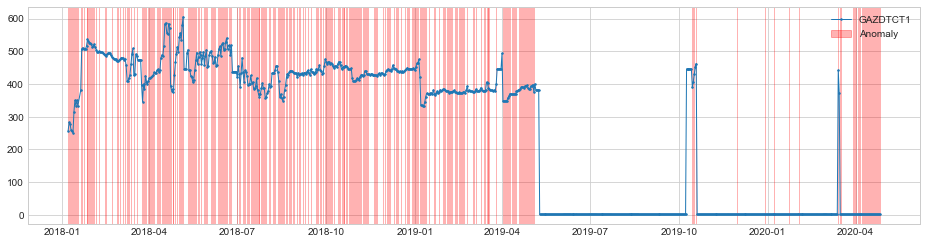

In [56]:

from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.4))
anomalies = outlier_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

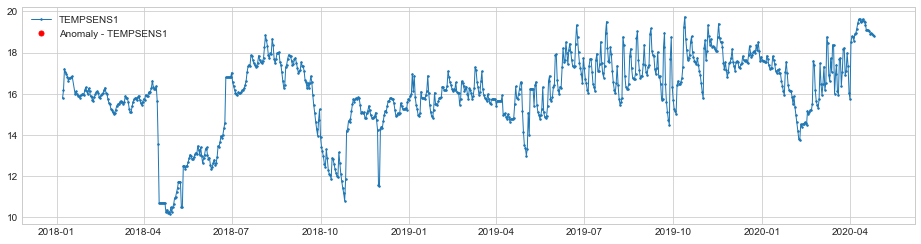

In [16]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=200, low=5)
anomalies = threshold_ad.detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

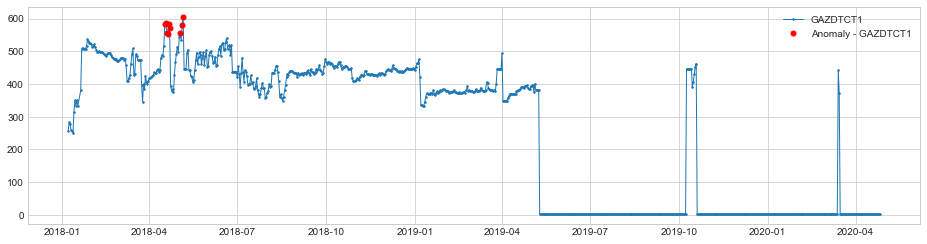

In [7]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

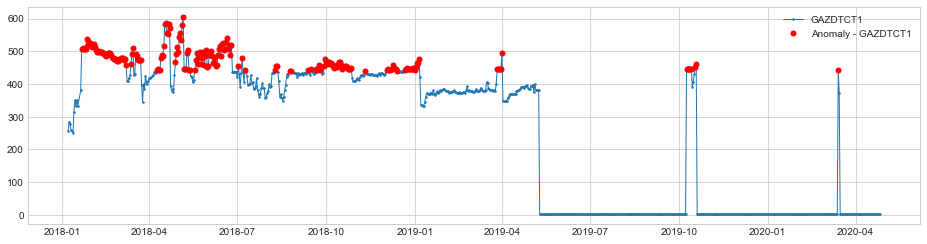

In [8]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.00005)
anomalies = iqr_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

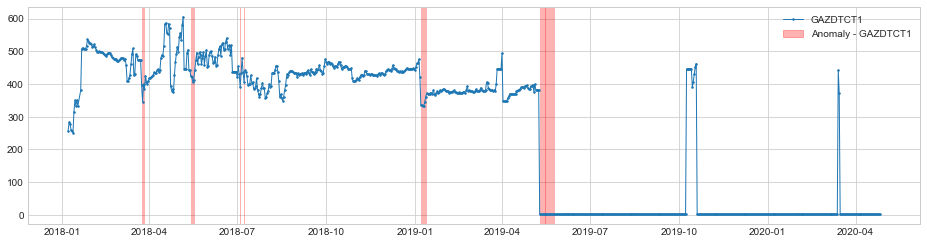

In [24]:

from adtk.detector import PersistAD
persist_ad = PersistAD(c=2.3, side='negative')
anomalies = persist_ad.fit_detect(df)

persist_ad.window = 30
anomalies = persist_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

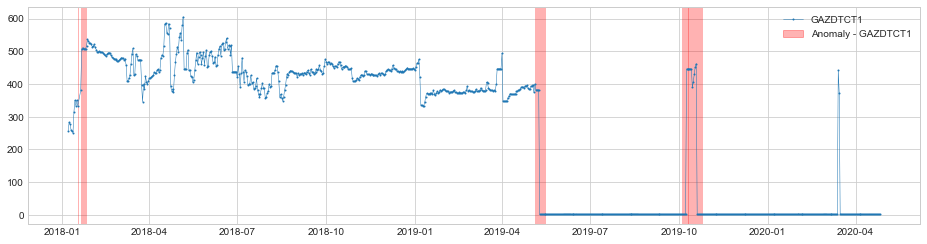

In [25]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=10)
anomalies = level_shift_ad.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color='red');

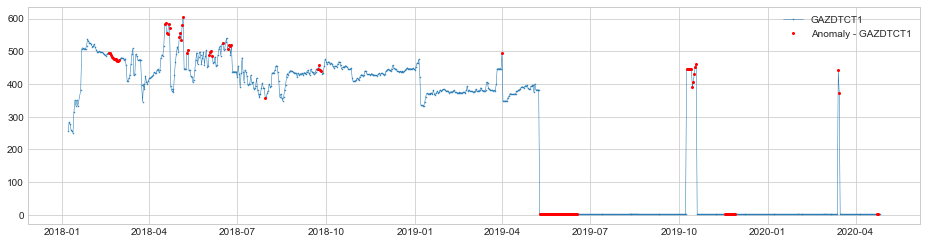

In [26]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=1, step_size=40, c=1.0)
anomalies = autoregression_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

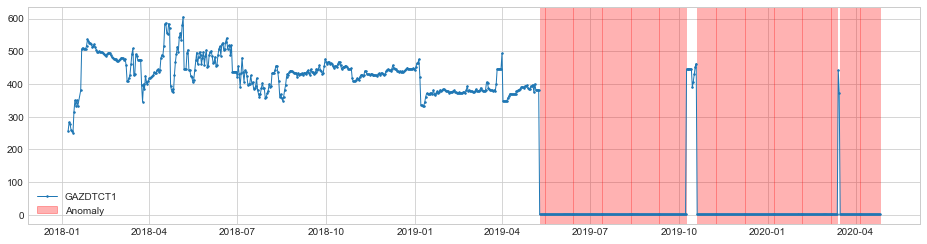

In [23]:
from sklearn.cluster import KMeans
from adtk.detector import MinClusterDetector
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=2))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

In [26]:
GAZ[anomalies.values]

Time
2019-05-10    1.000000
2019-05-11    1.000000
2019-05-12    1.000000
2019-05-13    1.000000
2019-05-14    1.000000
                ...   
2020-04-22    1.109890
2020-04-23    1.163793
2020-04-24    1.142857
2020-04-25    1.076923
2020-04-26    1.144578
Name: GAZDTCT1, Length: 340, dtype: float64

In [4]:
GAZ = data_pivot['TEMPSENS1']
GAZ.index.names = ['Time']
GAZ.index = pd.to_datetime(GAZ.index)
df = validate_series(pd.DataFrame(GAZ))

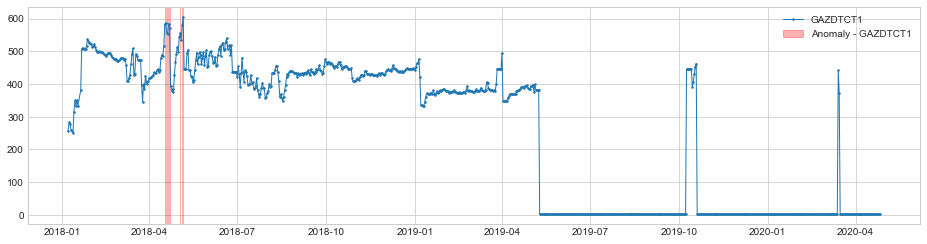

In [27]:
from sklearn.cluster import KMeans
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.15)
anomalies = quantile_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');
# plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.4, curve_group='all');

In [29]:
anomalies.values

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

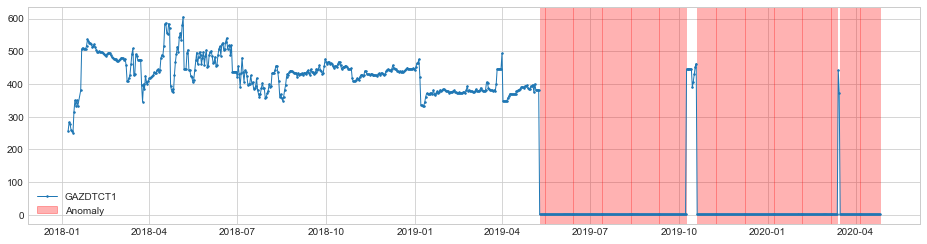

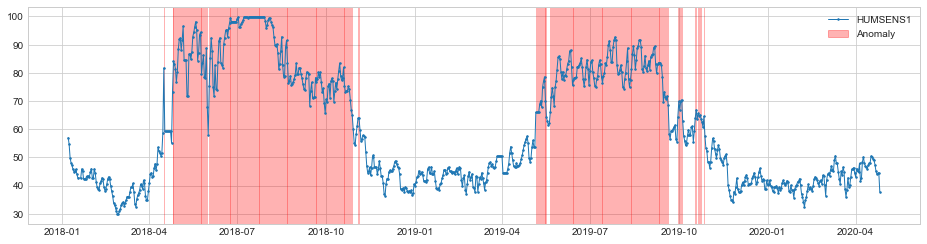

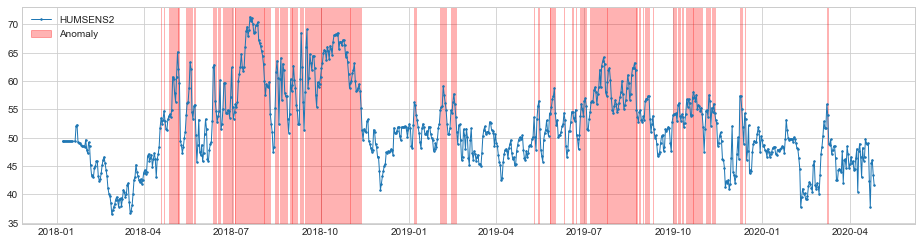

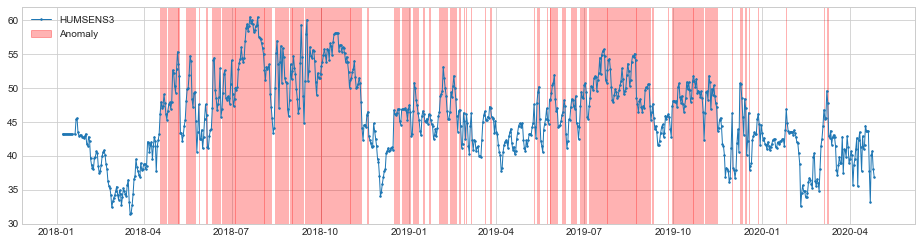

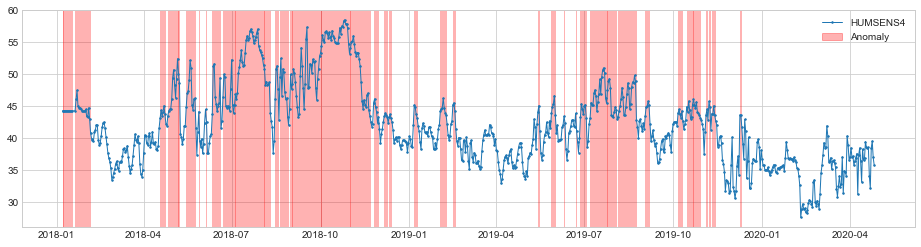

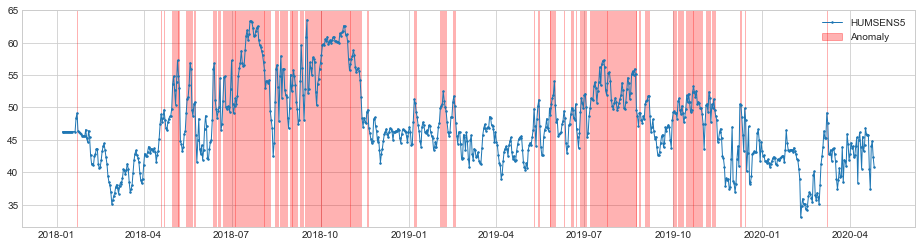

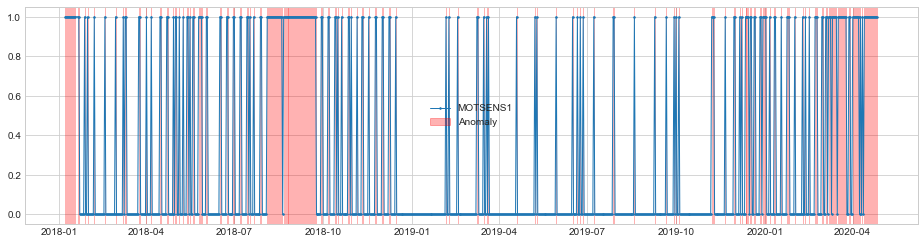

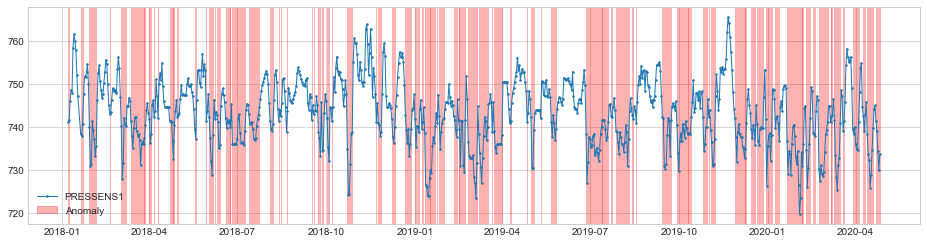

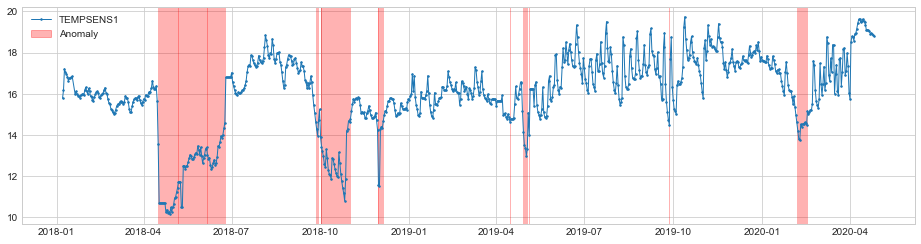

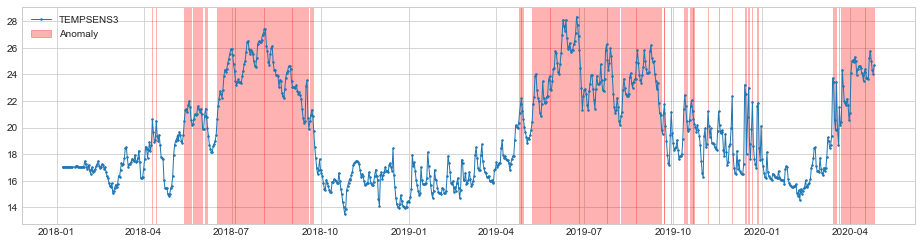

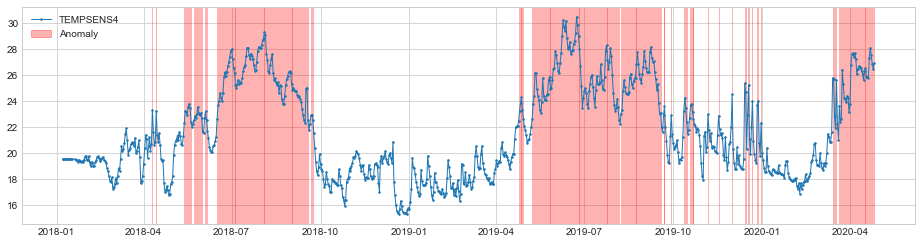

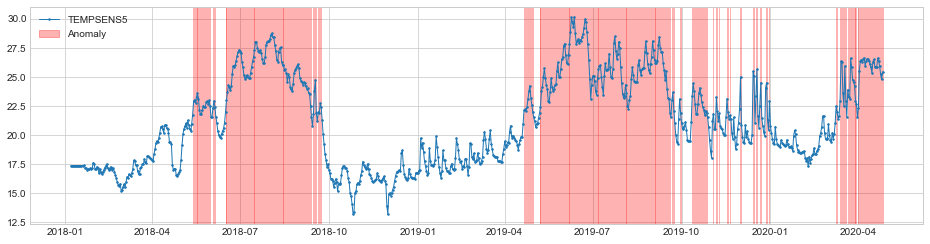

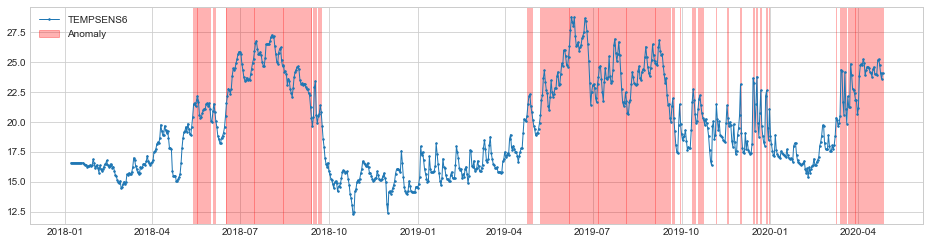

In [45]:
from sklearn.cluster import KMeans
from adtk.detector import PcaAD
from adtk.detector import MinClusterDetector
from adtk.detector import GeneralizedESDTestAD, ThresholdAD
from adtk.detector import LevelShiftAD
from adtk.detector import OutlierDetector,InterQuartileRangeAD, QuantileAD
from sklearn.neighbors import LocalOutlierFactor

for d in data_pivot.columns[:]:
    GAZ = data_pivot[d]
    GAZ.index.names = ['Time']
    GAZ.index = pd.to_datetime(GAZ.index)
    df = validate_series(pd.DataFrame(GAZ))   
    min_cluster_detector = MinClusterDetector(KMeans(n_clusters=2))
    anomalies = min_cluster_detector.fit_detect(df)
    plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

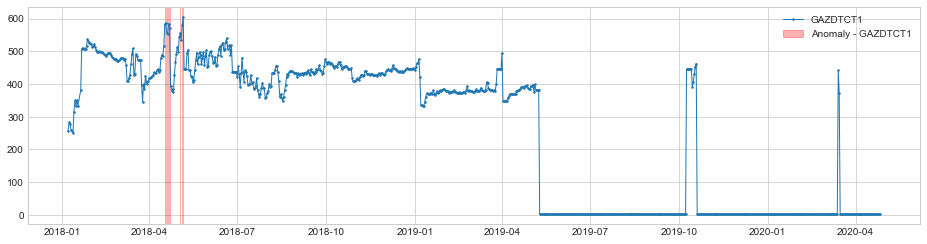

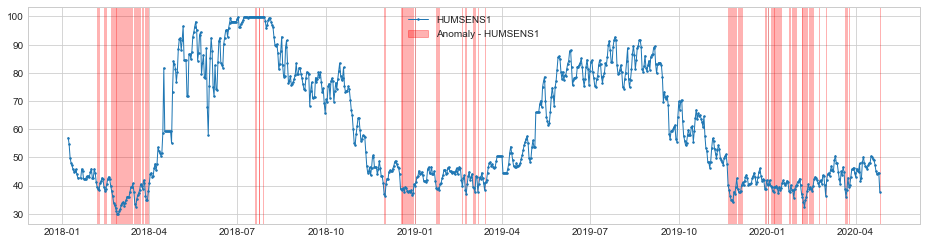

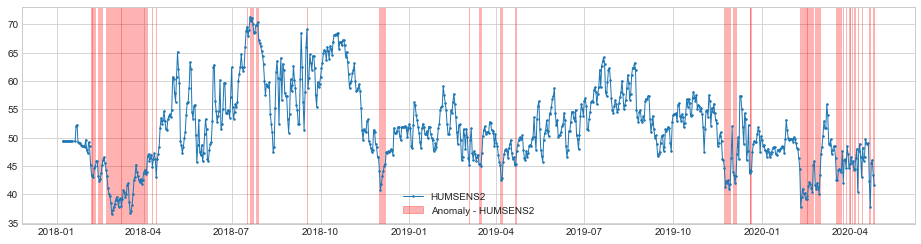

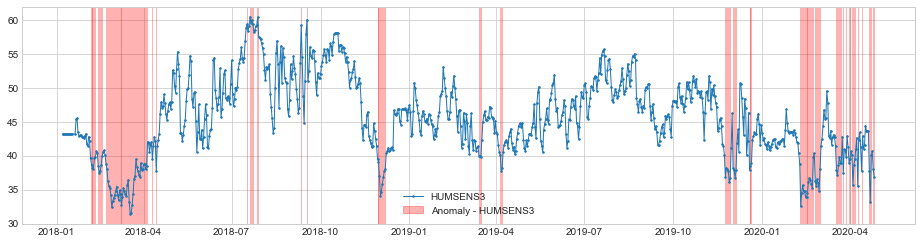

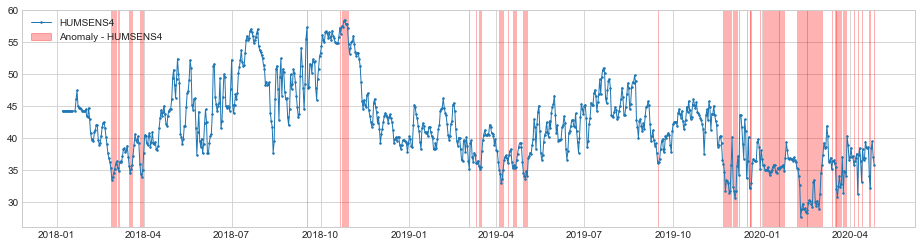

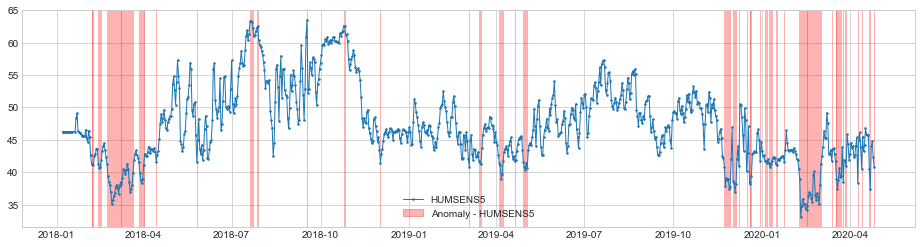

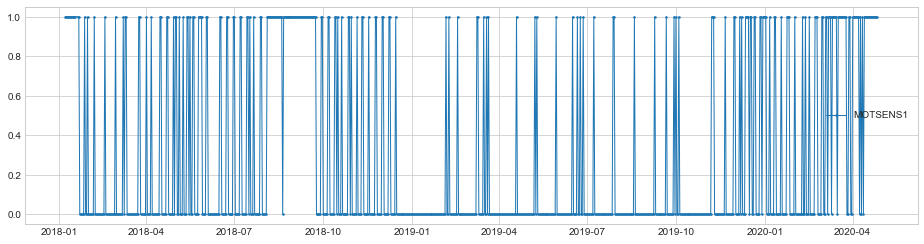

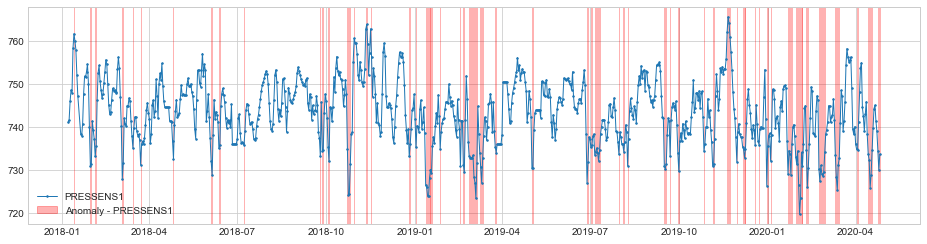

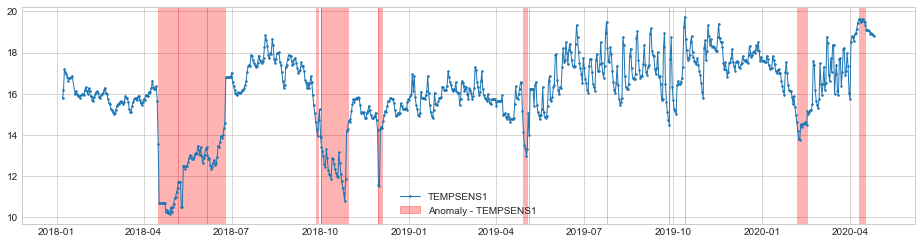

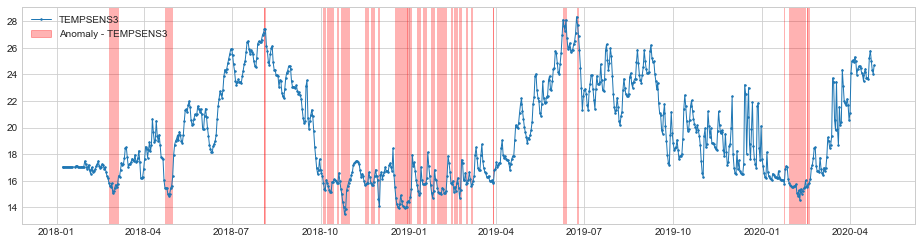

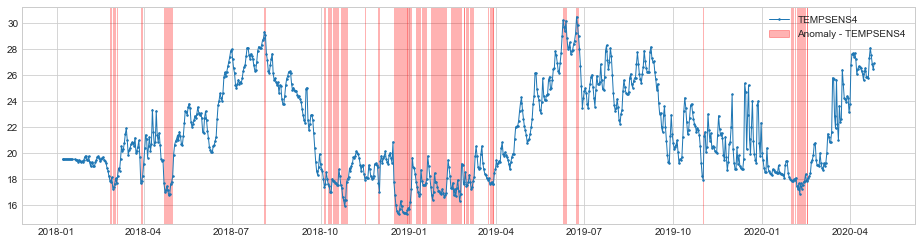

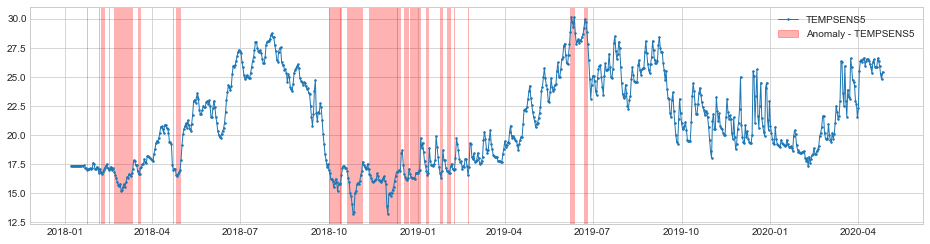

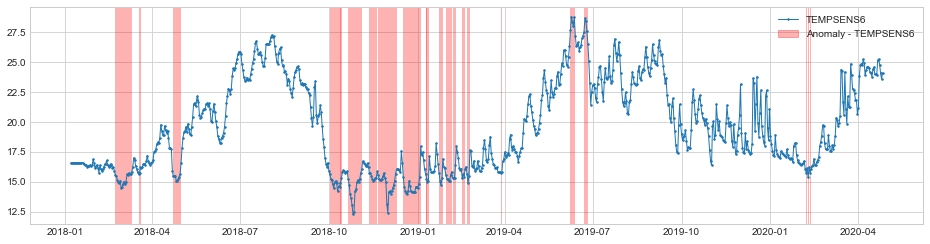

In [42]:
for d in data_pivot.columns[:]:
    GAZ = data_pivot[d]
    GAZ.index.names = ['Time']
    GAZ.index = pd.to_datetime(GAZ.index)
    df = validate_series(pd.DataFrame(GAZ))   
    quantile_ad = QuantileAD(high=0.99, low=0.15)
    anomalies = quantile_ad.fit_detect(df)
    plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

In [89]:
from fbprophet import Prophet

In [ ]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    print('Displaying Prophet plot')
    fig1 = m.plot(forecast)
    return forecast